In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt

In [2]:
import yfinance as yf

import datetime as dt

start= dt.datetime(2021,7,1)
end= dt.datetime(2022,1,27)
symbol= 'AXISBANK.NS' # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,727.748474,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [5]:
column="Close"

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [7]:
len(data1)

143

In [8]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

136
X_train length: (136, 1)
X_test length: (7, 1)
y_train length: (136, 1)
y_test length: (7, 1)


In [9]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

C:\ProgramData\anaconda3\envs\ajith\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\envs\ajith\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\envs\ajith\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE-Testset: 0.5317706652449596
maPe-Testset: 0.993006993006993
RMSE-Testset: 0.28836746864706225
maPe-Testset: 2345115509194.348
RMSE-Testset: 0.07236959087459398
maPe-Testset: 952631412130.7382
RMSE-Testset: 0.07246463927810848
maPe-Testset: 970184423447.8947


C:\ProgramData\anaconda3\envs\ajith\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\envs\ajith\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


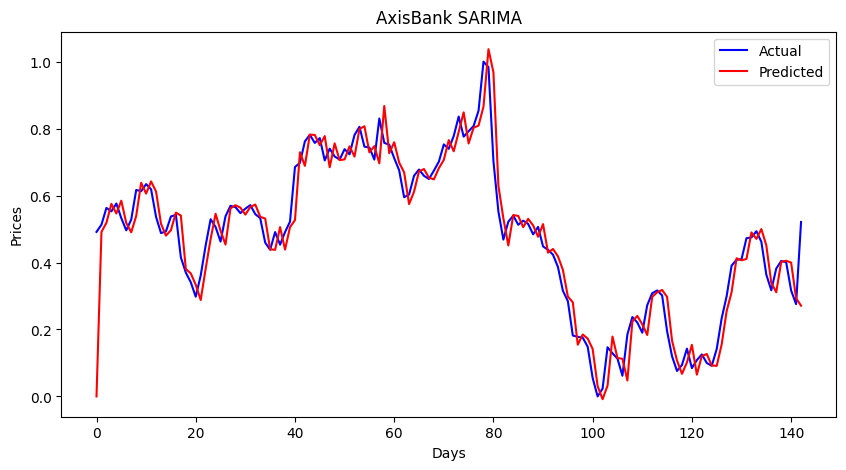

In [10]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","AxisBank SARIMA","Days","Prices")

In [11]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [12]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

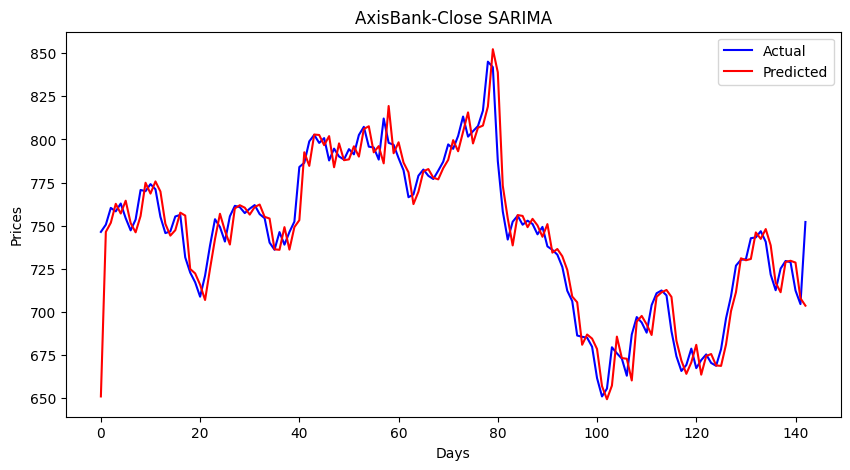

In [13]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AxisBank-Close SARIMA","Days","Prices")

In [14]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 14.058140019953045
maPe-Testset: 0.012186088865725815


C:\ProgramData\anaconda3\envs\ajith\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
forecast=model_fit.predict(len(data1), len(data1)+1)
forecast

array([0.5907717 , 0.59002488])

In [16]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [17]:
forecast_stock_price_test_oriF.to_csv("AxisBank SARIMA Closets.csv",index=False)

In [18]:
forecast_stock_price_test_oriF

,Closefore
0,765.709685
1,765.564802


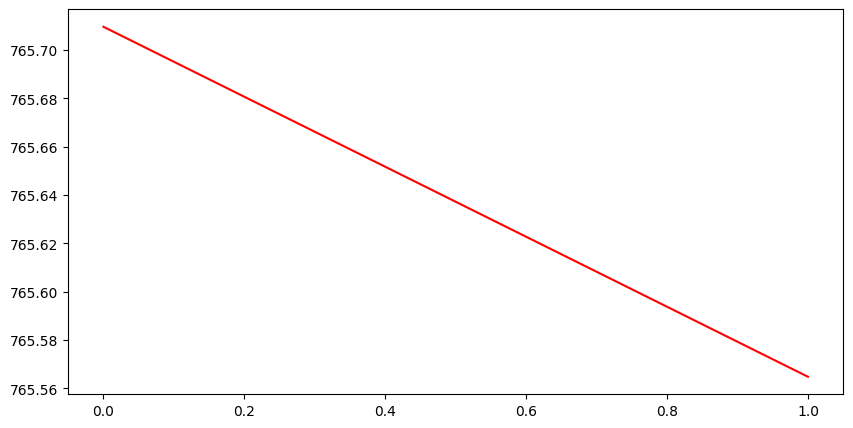

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[300:500], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")